In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


<div class="alert alert-warning">
<h3>Let's read in our data files for surface air temperature (TAS). We focus on using a consistent ensemble (#1) from CCSM4, but for varying representative concentration pathway (RCP) scenarios. These scenarios allow us to evaluate the different forcings from anthropogenic climate change.</h3>
</div>

In [2]:
### Create time arrays
years = np.arange(2006,2100+1,1)
months = np.arange(1,12+1,1)

In [3]:
### Read in data reader function
### See documentation for more details on inputs
from readCMIP5 import readCMIP5Data 

In [4]:
### Read in tas data for rcp26, rcp45, rcp85

# Call directory where you stored your data
directory = './data/SurfaceAirTemperature_tas/'

lat,lon,tas26 = readCMIP5Data(directory,'global','rcp26','1','tas') #[year,month,lat,lon]
lat,lon,tas45 = readCMIP5Data(directory,'global','rcp45','1','tas') #[year,month,lat,lon]
lat,lon,tas85 = readCMIP5Data(directory,'global','rcp85','1','tas') #[year,month,lat,lon]

In [5]:
### Create meshgrid of lats/lons --> now 2d arrays
lons,lats = np.meshgrid(lon,lat)

<div class="alert alert-warning">
<h3> We are interested in the change in temperature over the course of the model run (2006-2100). To evaluate this we begin with year initial (2006) and subtract it from year final (2100)</h3>
</div>

In [6]:
### Change in temperature from 2006 to 2100
change26 = tas26[-1,:,:] - tas26[0,:,:,:]
change45 = tas45[-1,:,:] - tas45[0,:,:,:]
change85 = tas85[-1,:,:] - tas85[0,:,:,:]

<div class="alert alert-warning">
<h3> Let's take a look at the zonally averaged change in temperature. Therefore, we are going to take the average across all longitudes. Our arrays will now be <code>[lat x month]</code>.</h3>
</div>

In [7]:
### Zonal changes
zchange26 = np.nanmean(change26,axis=2).transpose()
zchange45 = np.nanmean(change45,axis=2).transpose()
zchange85 = np.nanmean(change85,axis=2).transpose()

<div class="alert alert-warning">
<h3>We plot accordingly for each RCP model run. Limits with colorbars are standardized. But first, let's create a function for our uniform subplots.</h3>
</div>

In [8]:
def subplot(zchange):
    equator = [90]*zchange.shape[1]
    plt.plot(equator,linestyle='--',linewidth=2.5,color='k')
    
    plt.xticks(np.arange(0,12,1),map(str,(np.arange(1,13,1))))
    plt.yticks(np.arange(0,181,30),map(str,(np.arange(-90,91,30))))
    plt.colorbar()
    return

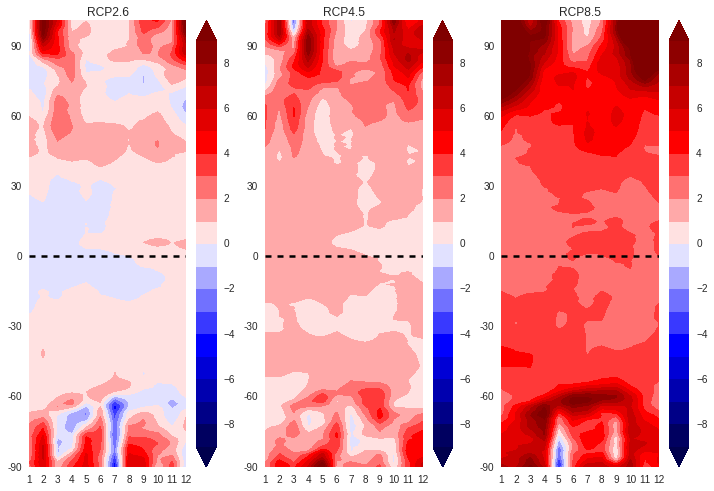

In [9]:
### Plot zonal changes
fig = plt.figure()

# limits for temperatures graphs
limits = np.arange(-9,10,1)

plt.subplot(131)
plt.contourf(zchange26,limits,cmap='seismic',extend='both')
subplot(zchange26)
plt.title('RCP2.6')

plt.subplot(132)
plt.contourf(zchange45,limits,cmap='seismic',extend='both')
subplot(zchange45)
plt.title('RCP4.5')

plt.subplot(133)
plt.contourf(zchange85,limits,cmap='seismic',extend='both')
subplot(zchange85)
plt.title('RCP8.5')

plt.show()

<div class="alert alert-warning">
<h3>We now see that the change in temperature is greatest at the poles, largest during the climatological winter, and highest overall in RCP8.5.
<br><br>
How does this look globally?</h3>
</div>

In [10]:
### Total year changes
yrchange26 = np.nanmean(change26,axis=0)
yrchange45 = np.nanmean(change45,axis=0)
yrchange85 = np.nanmean(change85,axis=0)

In [11]:
### Read in map plotting utility
### See documentation for more details on inputs
from plot_ArcticUtility import plotMap

# set limits for uniform maps
limits = np.arange(-9,10,1)

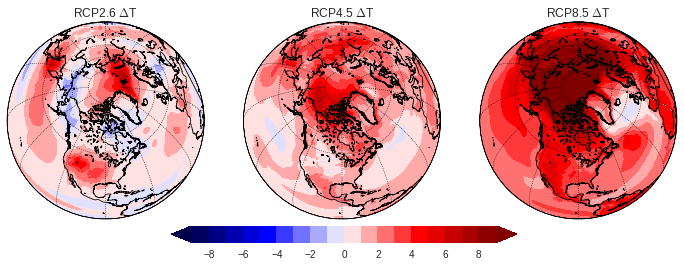

In [12]:
### Plot yearly changes
fig = plt.figure()

#############################################
ax1 = plt.subplot(131)
m = plotMap('ortho')
cs1 = m.contourf(lons,lats,yrchange26,limits,
                 latlon=True,extend='both')
cs1.set_cmap('seismic')
plt.title(r'RCP2.6 $\Delta$T')
#############################################
ax2 = plt.subplot(132)
m = plotMap('ortho')
cs2 = m.contourf(lons,lats,yrchange45,limits,
                 latlon=True,extend='both')
cs2.set_cmap('seismic')
plt.title(r'RCP4.5 $\Delta$T')
#############################################
ax3 = plt.subplot(133)
m = plotMap('ortho')
cs3 = m.contourf(lons,lats,yrchange85,limits,
                 latlon=True,extend='both')
cs3.set_cmap('seismic')
plt.title(r'RCP8.5 $\Delta$T')
#############################################
cbar_ax = fig.add_axes([0.315,0.3,0.4,0.03])                
cbar = fig.colorbar(cs3,cax=cbar_ax,orientation='horizontal',
                    extend='both',extendfrac=0.07,drawedges=True)

plt.show()

In [13]:
print 'RCP 2.6 Global Temperature Change = +%sC' % (np.round(np.nanmean(change26),2))
print 'RCP 4.5 Global Temperature Change = +%sC' % (np.round(np.nanmean(change45),2))
print 'RCP 8.5 Global Temperature Change = +%sC' % (np.round(np.nanmean(change85),2))
print '------------------------------------------'

RCP 2.6 Global Temperature Change = +0.75C
RCP 4.5 Global Temperature Change = +1.76C
RCP 8.5 Global Temperature Change = +4.43C
------------------------------------------


<div class="alert alert-warning">
<h3> Finally, we focus on the change in temperature over time for each model scenario. It is important to keep in mind that we are working with unequal grid cells on a spherical surface. For the purposes of simplification in this example, we will ignore equal weighting. Therefore, the following values are <i>overestimates</i> as they are weighted too heavily in the poles (where grid cell areas are smaller and warming is the greatest).</h3>
</div>

In [14]:
### Calculate initial and final temperature arrays
tas26i = np.apply_over_axes(np.nanmean,tas26[0],(0,1,2))
tas26i = np.squeeze(tas26i)
tas26f = np.apply_over_axes(np.nanmean,tas26,(1,2,3))
tas26f = np.squeeze(tas26f)

tas45i = np.apply_over_axes(np.nanmean,tas45[0],(0,1,2))
tas45i = np.squeeze(tas45i)
tas45f = np.apply_over_axes(np.nanmean,tas45,(1,2,3))
tas45f = np.squeeze(tas45f)

tas85i = np.apply_over_axes(np.nanmean,tas85[0],(0,1,2))
tas85i = np.squeeze(tas85i)
tas85f = np.apply_over_axes(np.nanmean,tas85,(1,2,3))
tas85f = np.squeeze(tas85f)

In [15]:
### Calculate change in temperature per year
delta26 = tas26f - tas26i
delta45 = tas45f - tas45i
delta85 = tas85f - tas85i

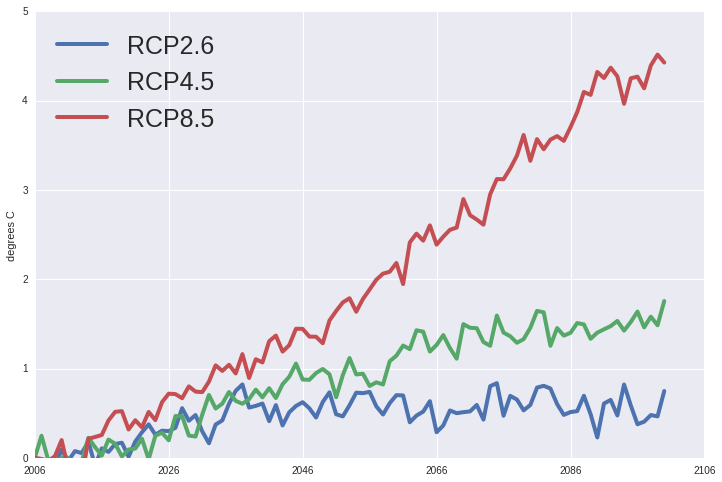

In [16]:
### Plot change in temperature
fig = plt.figure()
plt.plot(delta26,label='RCP2.6',linewidth=4,linestyle='-')
plt.plot(delta45,label='RCP4.5',linewidth=4,linestyle='-')
plt.plot(delta85,label='RCP8.5',linewidth=4,linestyle='-')

plt.ylim([0,5])
plt.xticks(np.arange(0,101,20),map(str,np.arange(2006,2107,20)))
plt.legend(loc='upper left',fontsize=25)
plt.ylabel('degrees C')

plt.show()

In [17]:
### Calculate final temperature in year 2100
fitas26 = np.apply_over_axes(np.nanmean,tas26[-1],(0,1,2))
fitas26 = np.squeeze(fitas26)

fitas45 = np.apply_over_axes(np.nanmean,tas45[-1],(0,1,2))
fitas45 = np.squeeze(fitas45)

fitas85 = np.apply_over_axes(np.nanmean,tas85[-1],(0,1,2))
fitas85 = np.squeeze(fitas85)

In [18]:
print 'RCP 2.6 Initial Global Mean Temperature = %sK' % np.round(tas26i,2)
print 'RCP 4.5 Initial Global Mean Temperature = %sK' % np.round(tas45i,2)
print 'RCP 8.5 Initial Global Mean Temperature = %sK' % np.round(tas85i,2)
print '------------------------------------------------'

print 'RCP 2.6 Final Global Mean Temperature = %sK' % np.round(fitas26,2)
print 'RCP 4.5 Final Global Mean Temperature = %sK' % np.round(fitas45,2)
print 'RCP 8.5 Final Global Mean Temperature = %sK' % np.round(fitas85,2)
print '------------------------------------------------'

RCP 2.6 Initial Global Mean Temperature = 278.29K
RCP 4.5 Initial Global Mean Temperature = 278.32K
RCP 8.5 Initial Global Mean Temperature = 278.24K
------------------------------------------------
RCP 2.6 Final Global Mean Temperature = 279.04K
RCP 4.5 Final Global Mean Temperature = 280.07K
RCP 8.5 Final Global Mean Temperature = 282.67K
------------------------------------------------
